In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [10]:
# 1. Charger le dataset
df = pd.read_csv("./../données/dataset_tfhe_execution_times5.csv")

In [11]:
# 2. Nettoyage de données
df = df.dropna(subset=["temps_s", "operation", "param_tfhe", "type_donnee", "nb_chiffres"])

In [12]:
# 3. Sélection des variables
X_raw = df[["operation", "param_tfhe", "type_donnee", "nb_chiffres"]]
y = df["temps_s"]

In [13]:
# 4. Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_raw[["operation", "param_tfhe", "type_donnee"]])
X_numeric = X_raw[["nb_chiffres"]].values

In [14]:
# 5. Concaténation des features encodées et numériques
X = np.concatenate([X_encoded, X_numeric], axis=1)

In [15]:
# 6. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 7. Entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# 8. Évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.6f} s")
print(f"R²: {r2:.4f}")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1.491640 s
R²: 0.9998
RMSE: 13.681090403694693


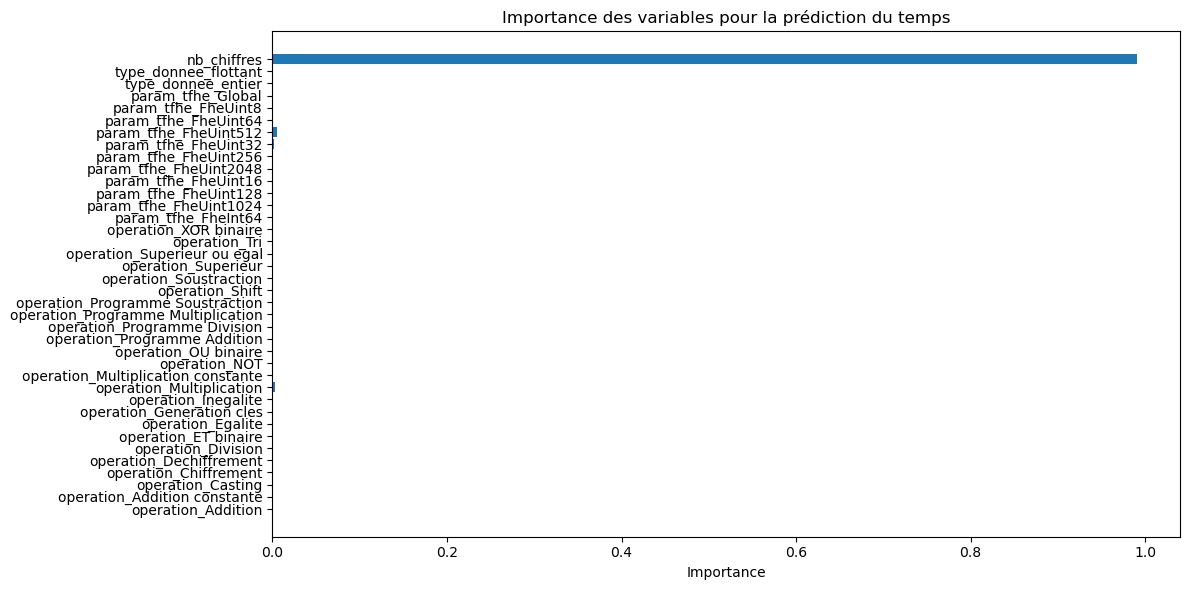

In [32]:
# 9. Importance des variables
feature_names = list(encoder.get_feature_names_out(["operation", "param_tfhe", "type_donnee"])) + ["nb_chiffres"]
importances = model.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Importance des variables pour la prédiction du temps")
plt.tight_layout()
plt.show()

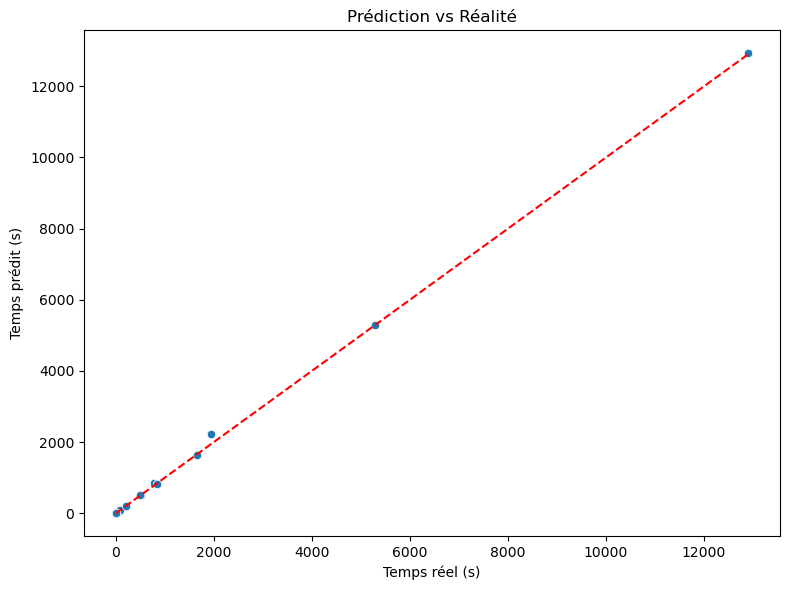

In [33]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Temps réel (s)")
plt.ylabel("Temps prédit (s)")
plt.title("Prédiction vs Réalité")
plt.tight_layout()
plt.show()

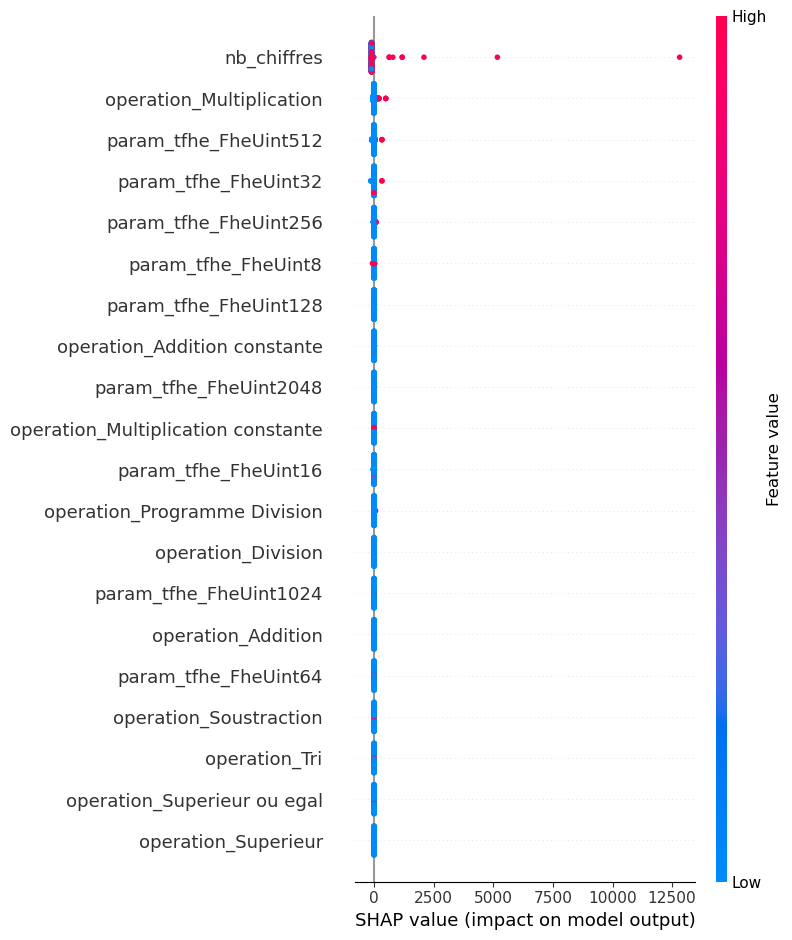

In [39]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)